## Ocular Disease SHAP
----------------------------------

In [33]:
import shap
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
#import pickle5 as pickle
import pickle
import os
import matplotlib.pyplot as plt

In [34]:
!pip3 install pickle5
import pickle5 as pickle

In [35]:
with open(r'./pickles/opth_all.pkl', 'rb') as handle:
    i = pickle.load(handle)
with open(r'./pickles/opthal_final_clf.pkl', 'rb') as handle:
    o = pickle.load(handle)
with open(r'./pickles/opth_phenbin_all_model_dict.pkl', 'rb') as tmpfile:
    model_dict = pickle.load(tmpfile)

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(i, np.asarray(o), random_state=42, test_size=0.2)

In [37]:
xtrain_means = shap.kmeans(np.asarray(xtrain), 100)

In [38]:
from distutils.sysconfig import get_python_lib
print(get_python_lib())

/opt/anaconda3/envs/Python37/lib/python3.7/site-packages


In [39]:
explainer = shap.TreeExplainer(model_dict['All']['RF'], 
                               data = np.asarray(xtrain), 
                               model_output="probability")
shap_values = explainer(np.asarray(xtest))

100%|===================| 1228/1230 [10:46<00:01]        

In [40]:
shap.initjs()

In [41]:
explainer.expected_value[0]

0.5210238507695419

In [42]:
shap_values.values[0]

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 8.41758472e-06, -8.41758467e-06],
       [ 0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.76518498e-03, -1.76518492e-03],
       [ 3.35502826e-03, -3.35502832e-03],
       [ 2.50672090e-04, -2.50672042e-04]])

In [43]:
shap_values[0]

.values =
array([[ 0.00000000e+00,  0.00000000e+00],
       [ 8.41758472e-06, -8.41758467e-06],
       [ 0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.76518498e-03, -1.76518492e-03],
       [ 3.35502826e-03, -3.35502832e-03],
       [ 2.50672090e-04, -2.50672042e-04]])

.base_values =
array([0.52102385, 0.47897615])

.data =
array([0.        , 0.        , 0.        , ..., 0.0019308 , 0.0015715 ,
       0.00073338])

In [44]:
shap_values[0]

.values =
array([[ 0.00000000e+00,  0.00000000e+00],
       [ 8.41758472e-06, -8.41758467e-06],
       [ 0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.76518498e-03, -1.76518492e-03],
       [ 3.35502826e-03, -3.35502832e-03],
       [ 2.50672090e-04, -2.50672042e-04]])

.base_values =
array([0.52102385, 0.47897615])

.data =
array([0.        , 0.        , 0.        , ..., 0.0019308 , 0.0015715 ,
       0.00073338])

In [45]:
#shap.plots.force(explainer.expected_value[0], shap_values[0])

In [46]:
#shap.plots.waterfall(explainer.expected_value[0], shap_values[0], np.asarray(xtest)[0])

In [47]:
#??shap.plots.beeswarm

In [48]:
shap_values.values[0:5,0:5,0].shape

(5, 5)

In [49]:
shap_values.values[:,:,0].shape

(615, 1821)

In [50]:
# get probabilities so we can check that the sum of SHAP makes sense
y_probs = model_dict['All']['RF'].predict_proba(xtest)

In [51]:
y_probs[0]

array([0.62076666, 0.37923334])

In [52]:
shap_values.base_values

array([[0.52102385, 0.47897615],
       [0.52102385, 0.47897615],
       [0.52102385, 0.47897615],
       ...,
       [0.52102385, 0.47897615],
       [0.52102385, 0.47897615],
       [0.52102385, 0.47897615]])

In [53]:
shap_values.base_values[0][0]+shap_values.values[0,:,0].sum()

0.6207846773364583

In [54]:
shap_values.values[0,:,1].sum()

-0.09976082582227727

In [55]:
shap_values.base_values[0][1]+shap_values.values[0,:,1].sum()

0.37921532340816644

In [56]:
shap_values.values.shape

(615, 1821, 2)

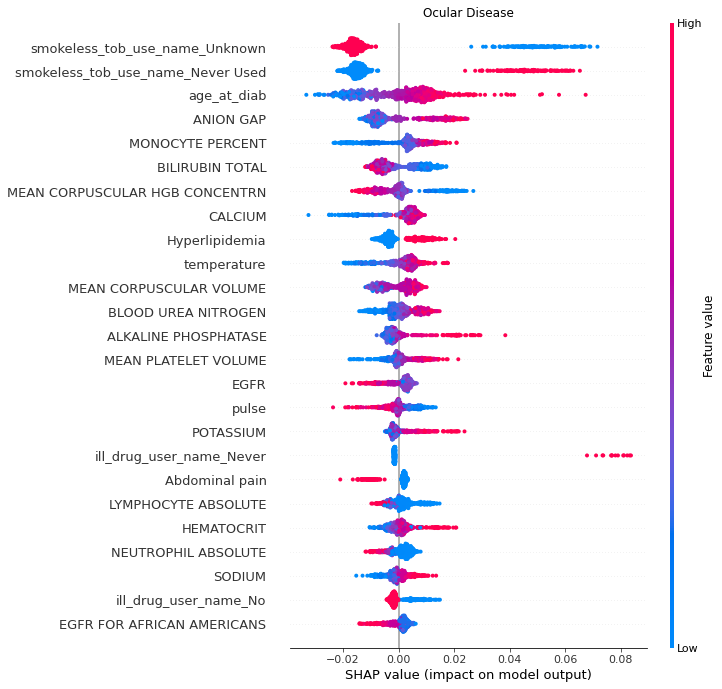

In [62]:
shap.summary_plot(shap_values.values[:,:,1], feature_names=xtrain.columns, features=xtest, 
                   max_display=25, show=False)
plt.title("Ocular Disease")
plt.savefig(r'./figures/opth25-shap.svg', bbox_inches='tight',format='svg')

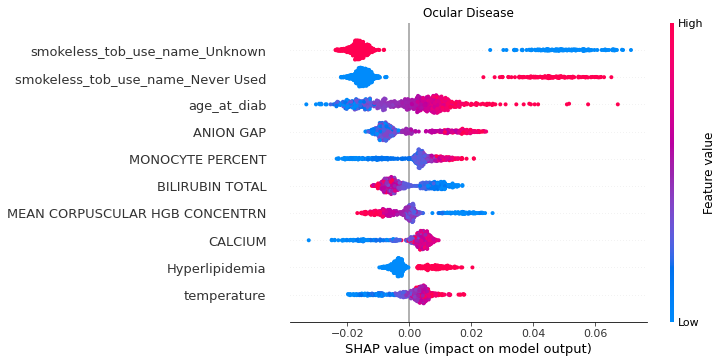

In [61]:
shap.summary_plot(shap_values.values[:,:,1], feature_names=xtrain.columns, features=xtest, 
                   max_display=10, show=False)
plt.title("Ocular Disease")
plt.savefig(r'./figures/opth10-shap.svg', bbox_inches='tight',format='svg')